# Support Vector Regression (SVR)

## Importing the libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [39]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [40]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [41]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [42]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x = scx.fit_transform(X)
scy = StandardScaler()
y = scy.fit_transform(y)

#scaler

In [44]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [45]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [46]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [47]:
ScaledValue = regressor.predict(scx.transform([[6.5]]))
print(ScaledValue)

[-0.27861589]


In [48]:
scy.inverse_transform([ScaledValue])

array([[170370.0204065]])

## Visualising the SVR results

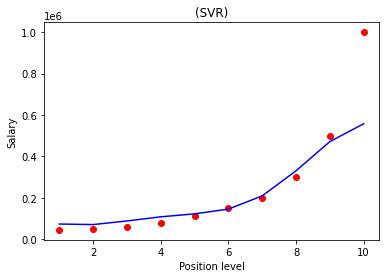

In [66]:
plt.scatter(scx.inverse_transform(x), scy.inverse_transform(y), color = 'red')
plt.plot(scx.inverse_transform(x), scy.inverse_transform(regressor.predict(x).reshape(-1, 1)), color = 'blue')
plt.title('(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()